# XY Model Analysis

In [2]:
from ising_lib import *
%matplotlib inline
from matplotlib import cm
import os
from numpy import *

## Raw Data Aquisition and PreProcessing (for compiled_thermalize_lattices)

In [13]:
# BASE_FOLDER='../simulation_data/raw/n64_rg_sbf_folded/'
BASE_FOLDER='../../raw_data_serc/progress_folder/36/N36_0.470_compiledMCSF_A/history/'
# tag_name=BASE_FOLDER[:-1].split("/")[-1]
# BASE_FOLDER='../simulation_data/resampled/N10_bkp/'
# BASE_FOLDER='../simulation_data/raw/N24_Hsweep/compiled/history/'
tag_name=BASE_FOLDER[:-1].split("/")[-2]
f=open(BASE_FOLDER+"Hfnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1]+".txt")
    l=f.readline()
f.close()

In [11]:
# BASE_FOLDER='../simulation_data/raw/n64_rg_sbf_folded/'
BASE_FOLDER='../../raw_data_serc/progress_folder/48/N48_0.462_DPC/history/'
# tag_name=BASE_FOLDER[:-1].split("/")[-1]
# BASE_FOLDER='../simulation_data/resampled/N10_bkp/'
# BASE_FOLDER='../simulation_data/raw/N24_Hsweep/compiled/history/'
tag_name=BASE_FOLDER[:-1].split("/")[-2]
f=open(BASE_FOLDER+"Hfnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1]+".txt")
    l=f.readline()
f.close()
print("TAG = ",tag_name," , Files to be analyzed : " ,len(fnames))
make_acf_config(BASE_FOLDER)

TAG =  N48_0.462_DPC  , Files to be analyzed :  15
Reading  1  /  15  L =  48  T =  1  J =  0.462  H0 =  0.0001 ...  CT =  388 CT err =  2.30 status :  True
Reading  2  /  15  L =  48  T =  1  J =  0.462  H0 =  0.0001 ...  CT =  372 CT err =  2.26 status :  True
Reading  3  /  15  L =  48  T =  1  J =  0.462  H0 =  0.0004 ...  CT =  1680 CT err =  6.14 status :  True
Reading  4  /  15  L =  48  T =  1  J =  0.462  H0 =  0.0004 ...  CT =  1640 CT err =  4.87 status :  True
Reading  5  /  15  L =  48  T =  1  J =  0.462  H0 =  0.0009 ...  CT =  1485 CT err =  4.65 status :  True
Reading  6  /  15  L =  48  T =  1  J =  0.462  H0 =  0.0009 ...  CT =  1476 CT err =  5.68 status :  True
Reading  7  /  15  L =  48  T =  1  J =  0.462  H0 =  0.0016 ...  CT =  2101 CT err =  6.48 status :  True
Reading  8  /  15  L =  48  T =  1  J =  0.462  H0 =  0.0016 ...  CT =  2202 CT err =  5.58 status :  True
Reading  9  /  15  L =  48  T =  1  J =  0.462  H0 =  0.0025 ...  CT =  1509 CT err =  6.83 sta

## Thermalization Study

### Analyze Thermal history for the  system from ./omp_thermalize ,./joinHist

../../raw_data_serc/progress_folder/36/N36_0.600_compiled/history/LId_0_L_36_T_1.000_J_0.600_H_[0.00160|0.00000]O2.txt
Doing  1   /  15


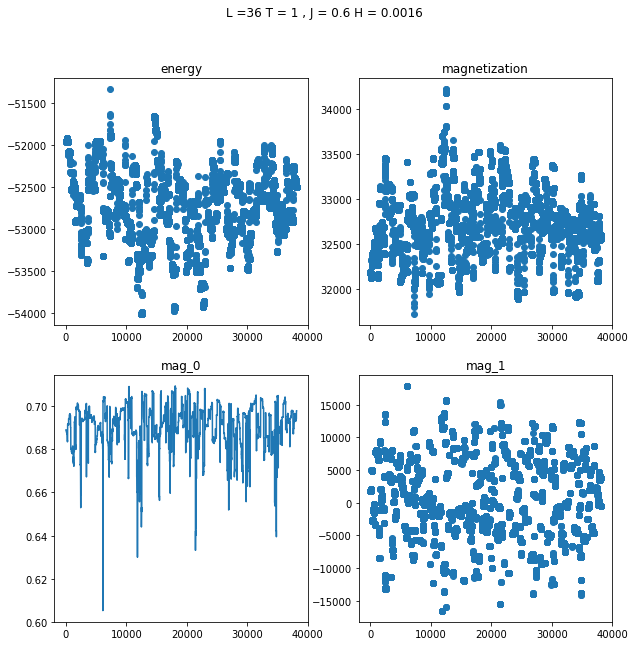

In [7]:
f_id=0
i=0
for nme in [fnames[f_id]]:
    print(nme)
    i+=1
    print("Doing ",i,"  / ",len(fnames))
    data=get_data_OnModel(nme)
    n0=0;
    nf=-1;
    name="L ="+str(data['params']['length of lattice'])+" T = "+str(data['params']['T'])+" , J = "+str(data['params']['J']) +" H = "
    name+=str(data['params']['H0'])
    f,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
    ax[0][0].scatter(data['time'][n0:nf],data['energy'][n0:nf])
    ax[0][0].set_title("energy")
    ax[0][1].scatter(data['time'][n0:nf],data['magentization'][n0:nf])
    ax[0][1].set_title("magnetization")
    Y=[i/36**3 for i in data['magentization_n'][0][n0:nf]]
    ax[1][0].plot(data['time'][n0:nf],Y)
    ax[1][0].set_title("mag_0")
    ax[1][1].scatter(data['time'][n0:nf],data['magentization_n'][1][n0:nf])
    ax[1][1].set_title("mag_1")
    f.suptitle(name)
#     plt.close()
    # plt.plot(data[''])

In [8]:
s4=[i**4 for i in Y]
s2=[i**2 for i in Y]
le=len(Y)

In [11]:
a=average(s4)

In [12]:
b=average(s2)

In [13]:
1-(a/(3*b**2))

0.6663728803738841

## Saving thermal history graphs

In [14]:
if not os.path.exists(BASE_FOLDER+"analysis"):
    os.mkdir(BASE_FOLDER+"analysis")
if not os.path.exists(BASE_FOLDER+"analysis/thermal_history"):
    os.mkdir(BASE_FOLDER+"analysis/thermal_history")
i=0
for nme in fnames:
    i+=1
    print("Doing ",i,"  / ",len(fnames) ," : ",nme[-120:])
    data=get_data_OnModel(nme)
    n0=0;
    nf=-1;
    name="L ="+str(data['params']['length of lattice'])+" T = "+str(data['params']['T'])+" , J = "+str(data['params']['J']) +" H = "
    name+=str(data['params']['H0'])
    f,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
    ax[0][0].scatter(data['time'][n0:nf],data['energy'][n0:nf])
    ax[0][0].set_title("energy")
    ax[0][1].scatter(data['time'][n0:nf],data['magentization'][n0:nf])
    ax[0][1].set_title("magnetization")
    ax[1][0].scatter(data['time'][n0:nf],data['magentization_n'][0][n0:nf])
    ax[1][0].set_title("magnetization_x")
    ax[1][1].scatter(data['time'][n0:nf],data['magentization_n'][1][n0:nf])
    ax[1][1].set_title("magnetization_y")
    f.suptitle(name)
    plt.savefig(BASE_FOLDER+"analysis/thermal_history/"+nme.split("/")[-1][:-4]+".png")
    plt.close()
#     plt.plot(data[''])

Doing  1   /  30  :  raw_data_serc/progress_folder/36/N36_0.470_compiledMCSF_A/history/LId_150_L_36_T_1.000_J_0.470_H_[0.00410|0.00000]O2.txt
Doing  2   /  30  :  raw_data_serc/progress_folder/36/N36_0.470_compiledMCSF_A/history/LId_151_L_36_T_1.000_J_0.470_H_[0.00410|0.00000]O2.txt
Doing  3   /  30  :  raw_data_serc/progress_folder/36/N36_0.470_compiledMCSF_A/history/LId_152_L_36_T_1.000_J_0.470_H_[0.00210|0.00000]O2.txt
Doing  4   /  30  :  raw_data_serc/progress_folder/36/N36_0.470_compiledMCSF_A/history/LId_153_L_36_T_1.000_J_0.470_H_[0.00210|0.00000]O2.txt
Doing  5   /  30  :  raw_data_serc/progress_folder/36/N36_0.470_compiledMCSF_A/history/LId_154_L_36_T_1.000_J_0.470_H_[0.00360|0.00000]O2.txt
Doing  6   /  30  :  raw_data_serc/progress_folder/36/N36_0.470_compiledMCSF_A/history/LId_155_L_36_T_1.000_J_0.470_H_[0.00360|0.00000]O2.txt
Doing  7   /  30  :  raw_data_serc/progress_folder/36/N36_0.470_compiledMCSF_A/history/LId_156_L_36_T_1.000_J_0.470_H_[0.00710|0.00000]O2.txt
Doing 

# Creating '.config' file with 'acf' values for resampling 

        After making raw simulation files from the xy_sweep/(or any other) make the config files used by 
        resampling code .. this makes the config files that have file name with .dat extension , correlation time 
        , correlation error and status in csv format

In [5]:
# Recheck Multiliters 
multipliers=[0.6, 1 , 1.6]

# MAX LAGS CONSIDERED FOR FINDING acf ; 
MAX_LAGS=12000

# FIT LENGTH CONSIDERED for fit acf curve ; 
FCOA=None # None :> = MAX_LAGS

#Thermalization skip for dataset ; 
THERMAL_SKIP=int(0)

def make_acf_config(BASE_FOLDER,RG=[]):
    config=open(BASE_FOLDER+'resampling.config','w')
    if(RG!=[]):
        Mconfig=open(BASE_FOLDER+'Mresampling.config','w')
    error=open(BASE_FOLDER+'resampling_error_log.config','w')
    L=len(fnames)
    count=0
    ct,ct_err,status=[],[],[]
    for i in multipliers:
        ct.append(0)
        ct_err.append(0)
        status.append(False)

    for name in fnames:
        count+=1
        rslt=get_data_OnModel(name)
        if rslt['params']['sweeps']<10000:
            continue
        print("Reading ",count," / ",L," L = ",rslt['params']['length of lattice']," T = ",rslt['params']['T'],
              " J = ",rslt['params']['J']," H0 = ",rslt['params']['H0'],
              end=" ... ")
        for i in range(len(multipliers)):
            ct[i],ct_err[i],status[i]=get_correlation_values(rslt['time'][THERMAL_SKIP:],
                                                                rslt['energy'][THERMAL_SKIP:],
                                                                rslt['magentization_n'][0][THERMAL_SKIP:],
                                                                int(MAX_LAGS*multipliers[i]),
                                                                fit_count_of_acf=FCOA)
        if max(ct)-min(ct) > 100:
            print("ALERT @ ",name,"  ",max(ct)-min(ct))
            error.write(name+" : \n")
            error.write("MAX LAGS, CT , CT_err ,status \n")
            for idx in range(len(multipliers)):
                error.write("{0:.2f}".format(MAX_LAGS*multipliers[i])+",")
                error.write("{0:.2f}".format(ct[idx])+","+
                            "{0:.2f}".format(ct_err[idx])+","+
                              str(status[idx])+"\n")
    #     else:
        idx=ct.index(max(ct))
        config.write(name.split('/')[-1][:-4]+","+
                     "{0:.2f}".format(ct[idx])+","+
                     "{0:.2f}".format(ct_err[idx])+","+
                     str(status[idx])+"\n")
        for rg in RG:
            Mconfig.write(name.split('/')[-1][:-4]+"_RG_"+str(rg)+","+
                     "{0:.2f}".format(ct[idx])+","+
                     "{0:.2f}".format(ct_err[idx])+","+
                     str(status[idx])+"\n")
        print(" CT = ",ct[idx],"CT err = ","{0:.2f}".format(ct_err[idx]),"status : ",status[0])
    error.close()
    config.close()

In [6]:
make_acf_config(BASE_FOLDER)

Reading  1  /  30  L =  36  T =  1  J =  0.47  H0 =  0.0041 ...  CT =  419 CT err =  5.05 status :  True
Reading  2  /  30  L =  36  T =  1  J =  0.47  H0 =  0.0041 ...  CT =  119 CT err =  1.77 status :  True
Reading  3  /  30  L =  36  T =  1  J =  0.47  H0 =  0.0021 ...  CT =  763 CT err =  7.72 status :  True
Reading  4  /  30  L =  36  T =  1  J =  0.47  H0 =  0.0021 ...  CT =  2161 CT err =  11.40 status :  True
Reading  5  /  30  L =  36  T =  1  J =  0.47  H0 =  0.0036 ...  CT =  375 CT err =  3.70 status :  True
Reading  6  /  30  L =  36  T =  1  J =  0.47  H0 =  0.0036 ...  CT =  263 CT err =  3.08 status :  True
Reading  7  /  30  L =  36  T =  1  J =  0.47  H0 =  0.0071 ...  CT =  41 CT err =  0.51 status :  True
Reading  8  /  30  L =  36  T =  1  J =  0.47  H0 =  0.0071 ...  CT =  78 CT err =  0.79 status :  True
Reading  9  /  30  L =  36  T =  1  J =  0.47  H0 =  0.0056 ...  CT =  70 CT err =  0.74 status :  True
Reading  10  /  30  L =  36  T =  1  J =  0.47  H0 =  0.

## Verification for ACF

In [7]:
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf 
%matplotlib inline

../extracted_data/acf_N36_0.470_compiledB_mcsf.png
1  /  15 ../../raw_data_serc/progress_folder/36/N36_0.470_compiledB_mcsf/history/LId_100_L_36_T_1.000_J_0.470_H_[0.00310|0.00000]O2.txt
2  /  15 ../../raw_data_serc/progress_folder/36/N36_0.470_compiledB_mcsf/history/LId_101_L_36_T_1.000_J_0.470_H_[0.00310|0.00000]O2.txt
3  /  15 ../../raw_data_serc/progress_folder/36/N36_0.470_compiledB_mcsf/history/LId_102_L_36_T_1.000_J_0.470_H_[0.00060|0.00000]O2.txt
4  /  15 ../../raw_data_serc/progress_folder/36/N36_0.470_compiledB_mcsf/history/LId_103_L_36_T_1.000_J_0.470_H_[0.00060|0.00000]O2.txt
5  /  15 ../../raw_data_serc/progress_folder/36/N36_0.470_compiledB_mcsf/history/LId_104_L_36_T_1.000_J_0.470_H_[0.00460|0.00000]O2.txt
6  /  15 ../../raw_data_serc/progress_folder/36/N36_0.470_compiledB_mcsf/history/LId_90_L_36_T_1.000_J_0.470_H_[0.00410|0.00000]O2.txt
7  /  15 ../../raw_data_serc/progress_folder/36/N36_0.470_compiledB_mcsf/history/LId_91_L_36_T_1.000_J_0.470_H_[0.00410|0.00000]O2.txt

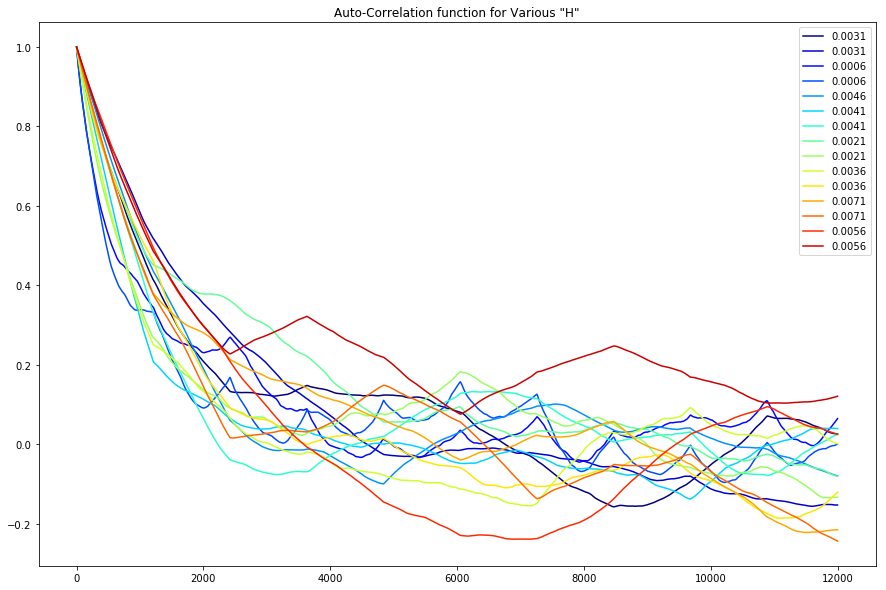

In [11]:
Len=len(fnames)
print('../extracted_data/acf_'+tag_name+".png")
plt.figure(figsize=(15,10))
ma=len(fnames)
if ma > 0   :
    factor=1/(ma)
else:
    factor=0
for idx in range(len(fnames)):
    print(idx+1," / ",Len , fnames[idx])
    data=get_data_OnModel(fnames[idx])
    K_fit=FCOA
    Max_lags=MAX_LAGS
    c=acf(data['energy'],nlags=Max_lags,fft=True)
    plt.plot([i for i in range(len(c[:K_fit]))],c[:K_fit],label=str(data['params']['H0']),c=cm.jet(idx*factor))
plt.legend(loc=1)
plt.title('Auto-Correlation function for Various "H"')
plt.savefig(BASE_FOLDER+'analysis/acf_'+tag_name+".png",dpi=300)

## OFFSET Reader

In [7]:
BASE_FOLDER='../../raw_data_serc/compiled_thermalized_lattices/N12_0.46_thermalized/lattices/'
tag_name=BASE_FOLDER[:-1].split("/")[-2]
f=open(BASE_FOLDER+"latnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    l=l.split(',')[0]
    fnames.append(BASE_FOLDER+l+".txt")
    l=f.readline()
f.close()
print("TAG = ",tag_name," , Files to be analyzed : " ,len(fnames))

TAG =  N12_0.46_thermalized  , Files to be analyzed :  15


In [77]:
BASE_FOLDER='../../raw_data_serc/compiled_thermalized_lattices/N48_thermalized/lattices/'
tag_name=BASE_FOLDER[:-1].split("/")[-2]
f=open(BASE_FOLDER+"latnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    l=l.split(',')[0]
    fnames.append(BASE_FOLDER+l+".txt")
    l=f.readline()
f.close()
print("TAG = ",tag_name," , Files to be analyzed : " ,len(fnames))
ofile=open(BASE_FOLDER+tag_name+'_'+'offsets.txt','w')
print(BASE_FOLDER+tag_name+'_'+'offsets.txt')
ofile.write("#L,J,H0,M,M0,My\n")
i=0
for nme in fnames:
    i+=1
    if i%5==0:
        print("Doing ",i,"  / ",len(fnames) ," : ",nme[-50:])
    data=get_data_OnModel(nme)
    m0=0
    m1=0
    for site in data['fstate']:
        m0+=site[0]
        m1+=site[1]
    ofile.write(str(data['params']['length of lattice'])+','+str(data['params']['J'])+','+str(data['params']['H0'])+',')
    ofile.write(str(sqrt(m0**2+m1**2))+','+str(m0)+','+str(m1)+'\n')
ofile.close()

TAG =  N48_thermalized  , Files to be analyzed :  15
../../raw_data_serc/compiled_thermalized_lattices/N48_thermalized/lattices/N48_thermalized_offsets.txt
Doing  5   /  15  :  _6_L_48_T_1.000_J_0.500_H_[0.00490|0.00000]_O2.txt
Doing  10   /  15  :  _8_L_48_T_1.000_J_0.500_H_[0.00810|0.00000]_O2.txt
Doing  15   /  15  :  14_L_48_T_1.000_J_0.500_H_[0.02250|0.00000]_O2.txt
